# Linear Regression with Python

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in California. She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

You then gather some information about a bunch of other houses in regions of California, and come up with the following data set:

[http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

In [10]:
from sklearn.datasets import load_boston

In [3]:
ca = datasets.california_housing.fetch_california_housing()

downloading Cal. housing from http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz to /Users/marci/scikit_learn_data


In [11]:
house = load_boston()

In [15]:
print(house.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [17]:
print(ca.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [53]:
y = pd.DataFrame(ca.target)

In [54]:
x = pd.DataFrame(ca.data)
x= x.ix[:,0:5]

In [64]:
import pandas as pd
CAhousing = pd.concat([x,y],axis=1)
CAhousing.columns = labels

In [73]:
CAhousing.head()

,average income,housing average age,average rooms,average bedrooms,population,average occupation,Price
0,83252.0,41.0,6.984127,1.023810,322.0,2.555556,4526000.0
1,83014.0,21.0,6.238137,0.971880,2401.0,2.109842,3585000.0
2,72574.0,52.0,8.288136,1.073446,496.0,2.802260,3521000.0
3,56431.0,52.0,5.817352,1.073059,558.0,2.547945,3413000.0
4,38462.0,52.0,6.281853,1.081081,565.0,2.181467,3422000.0


In [82]:
CAhousing=CAhousing[CAhousing['average rooms'] < 20]

In [88]:
CAhousing = CAhousing.drop('average occupation',axis=1)

In [101]:
CAhousing.columns = ['Avg. Area Income','Avg. Are House Age', 
                     'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 
                     'Area Population','Price','Address']

In [103]:
CAhousing.to_csv('California Housing Data')

In [99]:
CAhousing.describe()

,average income,housing average age,average rooms,average bedrooms,population,Price
count,20571.000000,20571.000000,20571.000000,20571.000000,2.057100e+04,2.057100e+04
mean,38714.703077,28.674834,5.334810,1.077549,1.429254e+05,2.069730e+06
std,18992.934942,12.580753,1.421825,0.197991,1.132342e+05,1.154520e+06
min,4999.000000,1.000000,0.846154,0.333333,3.000000e+02,1.499900e+05
25%,25641.500000,18.000000,4.438065,1.005882,7.910000e+04,1.197000e+06
50%,35357.000000,29.000000,5.224764,1.048421,1.168000e+05,1.798000e+06
75%,47444.500000,37.000000,6.041816,1.098765,1.727000e+05,2.650000e+06
max,150001.000000,52.000000,19.962121,6.500000,3.568200e+06,5.000010e+06


In [96]:
CAhousing['address'] = CAhousing['average bedrooms'].apply(lambda x: f.address())

In [72]:
CAhousing['Price'] = CAhousing['Price'].apply(lambda a: a*1000000)

In [91]:
from faker import Faker

In [93]:
f = Faker()

'01596 Lang Inlet\nAshleyfurt, CA 76348'

In [78]:
import seaborn as sns
%matplotlib inline

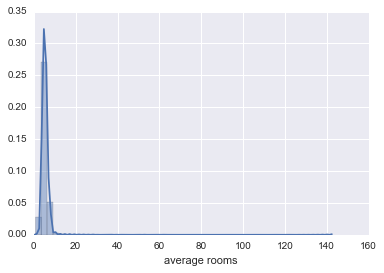

In [79]:
sns.distplot(CAhousing['average rooms'])